## Imports

In [1]:
from helpers import *

# Models
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Scalers
from sklearn.preprocessing import MinMaxScaler

# Reading Data

In [2]:
# feature extraction parameters
opt = {
        'sharpness_factor': 10,
        'bordersize': 3,
        'show_images': False,
        'is_binary': False,
        'LBP_numPoints': 8,
        'LBP_radius':1,
        'LBP_method': 'uniform',
        'HOG_width': 64,
        'HOG_height': 128,
    }

In [3]:
X, Y = read_data("data_set", windows=False)

0start ..
1start ..


In [4]:
data_train, data_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Extraction

In [5]:
HOG_feature_training, HINGE_feature_training, COLD_feature_training = extract_features(imgs=data_train, options=opt)

/home/passantabdelgalil/Documents/gender-classification/cold_feature_extraction.py:127: RuntimeWarning: divide by zero encountered in log10
  rhos_log_space = np.log10(rhos)


In [6]:
HOG_feature_testing, HINGE_feature_testing, COLD_feature_testing = extract_features(imgs=data_test, options=opt)

## Scaling Features

In [7]:
HOG_scaler = MinMaxScaler()
HOG_feature_training_scaled  = HOG_scaler.fit_transform(HOG_feature_training)
HOG_feature_testing_sclaed = HOG_scaler.transform(HOG_feature_testing)

HINGE_scaler = MinMaxScaler()
HINGE_feature_training_scaled = HINGE_scaler.fit_transform(HINGE_feature_training)
HINGE_feature_testing_scaled = HINGE_scaler.transform(HINGE_feature_testing)

COLD_scaler = MinMaxScaler()
COLD_feature_training_scaled = COLD_scaler.fit_transform(COLD_feature_training)
COLD_feature_testing_scaled = COLD_scaler.transform(COLD_feature_testing)

### Export Scaled features

In [8]:
all_train_features = np.concatenate((HOG_feature_training_scaled, HINGE_feature_training_scaled), axis=1)
all_train_features = np.concatenate((all_train_features, COLD_feature_training_scaled), axis=1)

all_test_features = np.concatenate((HOG_feature_testing_sclaed, HINGE_feature_testing_scaled), axis=1)
all_test_features = np.concatenate((all_test_features, COLD_feature_testing_scaled), axis=1)

In [9]:
import pandas as pd
pd.DataFrame(all_train_features).to_csv("train.csv", header=None, index=None)
pd.DataFrame(all_test_features).to_csv('test.csv', header=None, index=None)
pd.DataFrame(y_test).to_csv('test_classes.csv', header=None, index=None)
pd.DataFrame(y_train).to_csv('train_classes.csv', header=None, index=None)

## Training Model

In [10]:
clf2 = LinearSVC(max_iter=5000, random_state=42)

parameters2 = {
    'C': [1,10,100]
}

grid_clf2 = GridSearchCV(clf2, parameters2, scoring='f1')
grid_clf2.fit(all_train_features, y_train)
model = grid_clf2.best_estimator_

### Model Evaluation

Text(0.5, 1.0, 'Testing Confusion Matrix')

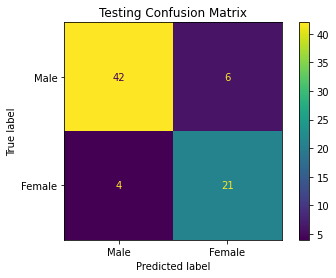

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ax= plt.subplot()
ConfusionMatrixDisplay.from_estimator(model, all_train_features, y_train, display_labels=['Male', 'Female'], ax=ax)

ax.set_title('Training Confusion Matrix')

ax= plt.subplot()
ConfusionMatrixDisplay.from_estimator(model, all_test_features, y_test, display_labels=['Male', 'Female'], ax=ax)

ax.set_title('Testing Confusion Matrix')

In [12]:
print(f"Training score is %0.2f"%(model.score(all_train_features, y_train) * 100))


test_pred = model.predict(all_test_features)
print(f"Testing accuracy is %0.2f"%(np.sum(test_pred == y_test)/len(y_test) * 100))

Training score is 100.00
Testing accuracy is 86.30


### Exporting Models to .sav files


In [13]:
import pickle



modelname='best_model_ever.sav'
pickle.dump(model, open(modelname, 'wb'))

HOG_scalername = 'HOG_scaler.sav'
HINGE_scalername = 'HINGE_scaler.sav'
COLD_scalername = 'COLD_scaler.sav'

pickle.dump(HOG_scaler, open(HOG_scalername, 'wb'))
pickle.dump(HINGE_scaler, open(HINGE_scalername, 'wb'))
pickle.dump(COLD_scaler, open(COLD_scalername, 'wb'))